# Iris Flowers Classification ML Project

## importing required library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

## load Iris data

In [2]:
# loading data from seaborn dataset
iris = sns.load_dataset('iris')

In [103]:
# display iris dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA (Exploratory Data Analysis )

In [104]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
# description about all features
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
# checking Nan or missing values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# co-relation between features
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Analysing the data visually


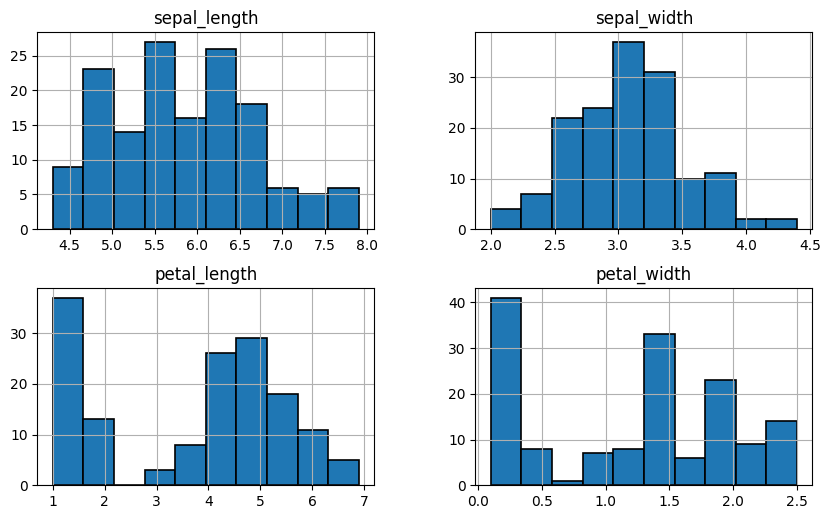

In [8]:
# histogram for all fetaures
plt.figure(dpi=100,figsize=(10,6))
ax = plt.gca()
iris.hist(edgecolor='black', linewidth=1.2,ax=ax)
plt.show()

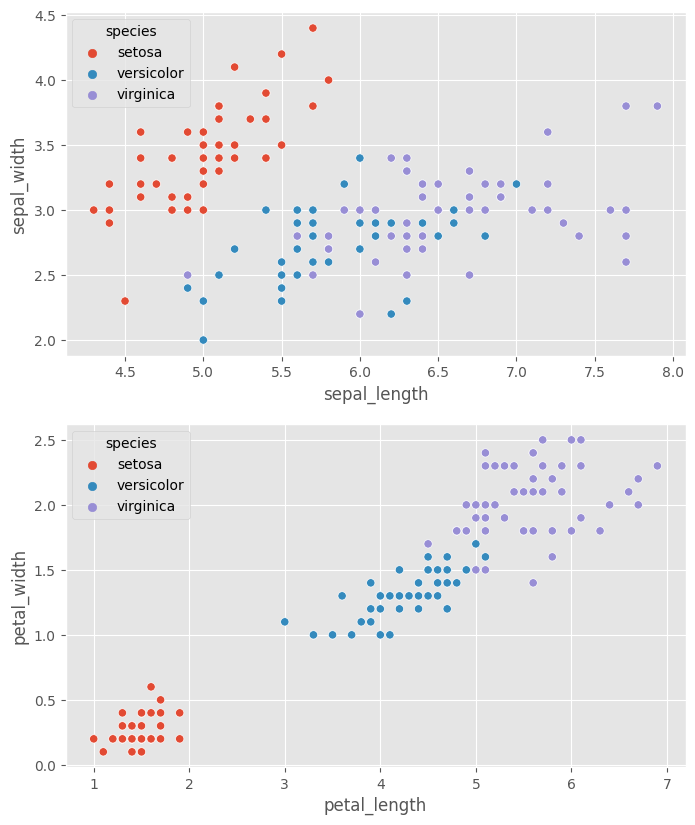

In [107]:
# scatter plot 

plt.figure(figsize = (8,10),dpi=100)
plt.subplot(2,1,1)
sns.scatterplot('sepal_length','sepal_width',data=iris,hue='species')
plt.subplot(2,1,2)
sns.scatterplot('petal_length','petal_width',data=iris,hue='species')
plt.show()

<Figure size 600x400 with 0 Axes>

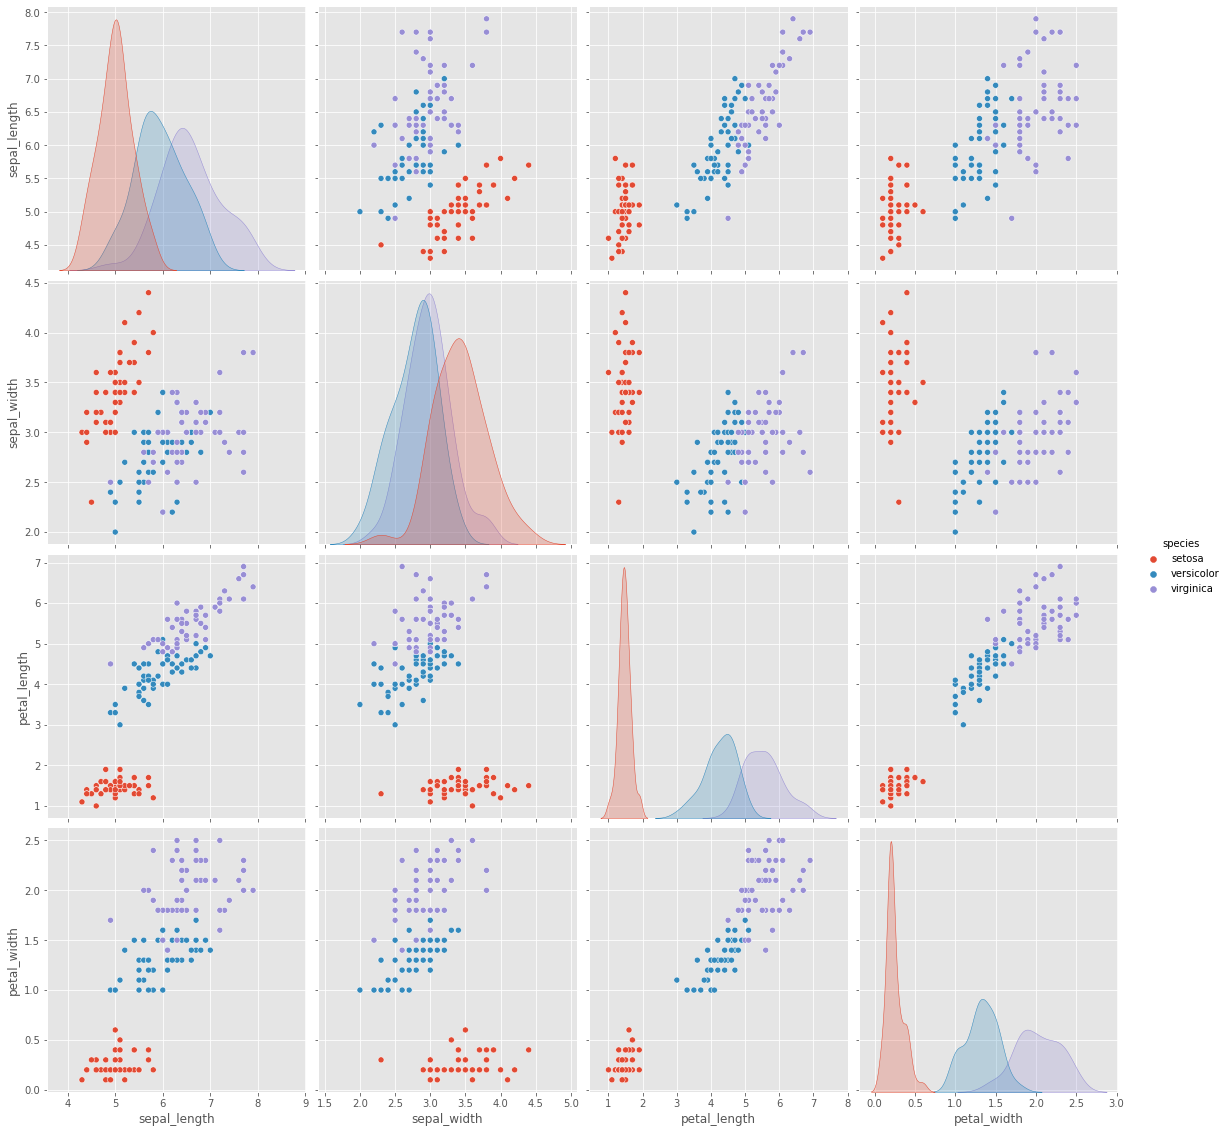

In [108]:
# pair plot 

plt.figure(dpi=100)
plt.style.use('ggplot')
sns.pairplot(iris,hue='species',size=4)
plt.show()

## spliting data for training and testing

In [11]:
X = iris.drop('species',axis=1).copy()
y = iris['species']

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [14]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [239]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,random_state=23,test_size=0.3)
(train_index, test_index), = split.split(X,y)

X_train,X_test,y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

In [240]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
33,5.5,4.2,1.4,0.2
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
59,5.2,2.7,3.9,1.4


In [241]:
y_train.head()

125     virginica
33         setosa
23         setosa
83     versicolor
59     versicolor
Name: species, dtype: object

In [242]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
43,5.0,3.5,1.6,0.6
146,6.3,2.5,5.0,1.9
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2
131,7.9,3.8,6.4,2.0


In [243]:
y_test.head()

43         setosa
146     virginica
81     versicolor
11         setosa
131     virginica
Name: species, dtype: object

### Feature Scaling

In [244]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying the algorithm

In [245]:

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# function for model detials
def model_report(model,X_train,X_test,y_train,y_test):
  
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test  = model.predict(X_test)
    print("_"*80)
    print()
    print(f"Training Accuracy: {accuracy_score(y_train, y_hat_train):.2f}")
    print(f"Test     Accuracy: {accuracy_score(y_test, y_hat_test):.2f}")

    print(f"Training confusion matrix : \n{confusion_matrix(y_train, y_hat_train)}" )
    print(f"Test  confusion matix : \n{confusion_matrix(y_test, y_hat_test)}")
    print()
    print('Training classification report :\n',classification_report(y_train,y_hat_train))
    print('Test classification report :\n',classification_report(y_test,y_hat_test))
    print('\n\n')


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression Model

In [247]:
model = LogisticRegression()
model_report(model,X_train,X_test,y_train,y_test)

________________________________________________________________________________

Training Accuracy: 0.95
Test     Accuracy: 0.98
Training confusion matrix : 
[[35  0  0]
 [ 0 33  2]
 [ 0  3 32]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Training classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.92      0.94      0.93        35
   virginica       0.94      0.91      0.93        35

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Test classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98 

### Decision Tree Model

In [249]:
model = DecisionTreeClassifier()
model_report(model,X_train,X_test,y_train,y_test)

________________________________________________________________________________

Training Accuracy: 1.00
Test     Accuracy: 1.00
Training confusion matrix : 
[[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Training classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00 

### SVC (Support Vector Machines) model

In [250]:
model = SVC(C=10, gamma=0.1, kernel='rbf')
model_report(model,X_train,X_test,y_train,y_test)

________________________________________________________________________________

Training Accuracy: 0.99
Test     Accuracy: 0.98
Training confusion matrix : 
[[35  0  0]
 [ 0 34  1]
 [ 0  0 35]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Training classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      0.97      0.99        35
   virginica       0.97      1.00      0.99        35

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

Test classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98 

### Random Forest model

In [252]:
model = RandomForestClassifier(max_depth= 10,max_features= 4,n_estimators=300)
model_report(model,X_train,X_test,y_train,y_test)

________________________________________________________________________________

Training Accuracy: 1.00
Test     Accuracy: 0.98
Training confusion matrix : 
[[35  0  0]
 [ 0 35  0]
 [ 0  0 35]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Training classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      1.00      1.00        35
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98 

### K-Nearest Neighbors model

In [268]:
model = KNeighborsClassifier(leaf_size=1,n_neighbors=9,p=1)
model_report(model,X_train,X_test,y_train,y_test)

________________________________________________________________________________

Training Accuracy: 0.97
Test     Accuracy: 0.96
Training confusion matrix : 
[[35  0  0]
 [ 0 35  0]
 [ 0  3 32]]
Test  confusion matix : 
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

Training classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.92      1.00      0.96        35
   virginica       1.00      0.91      0.96        35

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Test classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96 

## conclusion

    1. DecisionTreeClassifier        -- 100% 
    2. RandomForestClassifier        -- 98%
    3. SVC(Support Vector Machines)  -- 98%
    4. LogisticRegression            -- 98%
    5. KNeighborsClassifier          -- 96%